In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn .model_selection import train_test_split ,cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
pd.options.display.max_columns = None

# Data Understanding 

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Data statistics

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

shape

In [7]:
df.shape

(284807, 31)

check missing values

In [8]:
df.isna().sum().sum()

0

check duplicated values

In [9]:
df.duplicated().sum()

1081

# EDA (Explatory Data Analysis)

In [10]:
df.Class.unique()

array([0, 1])

In [11]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class'>

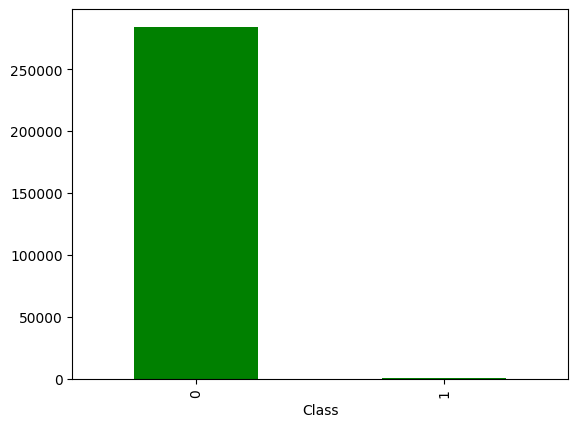

In [12]:
df.Class.value_counts().plot(kind='bar' ,color='g')

See the distribution of all the columns

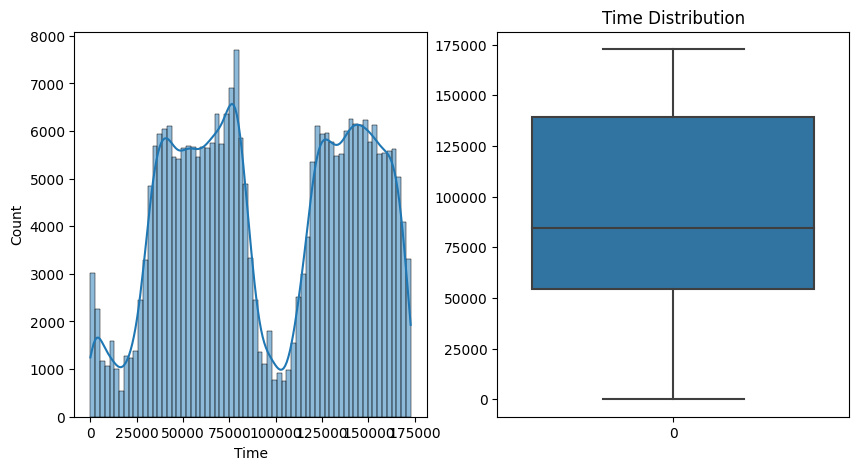

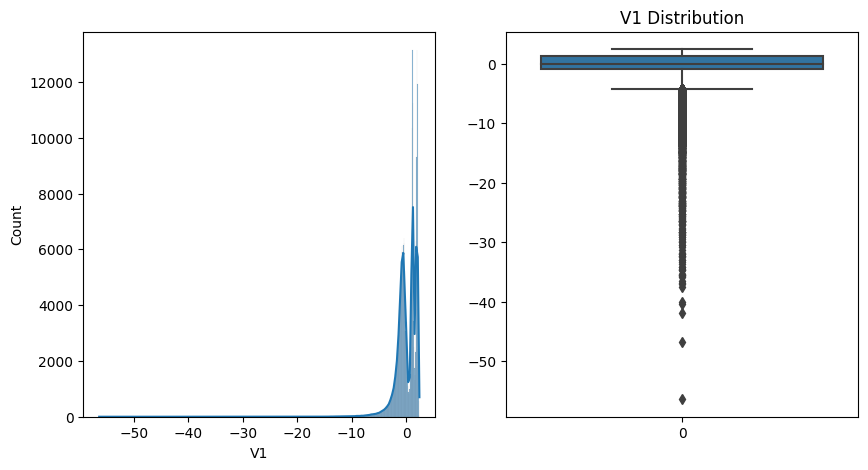

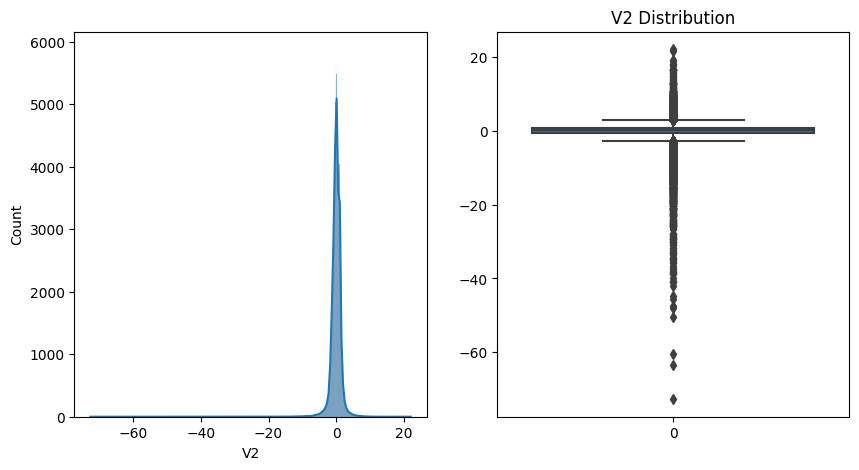

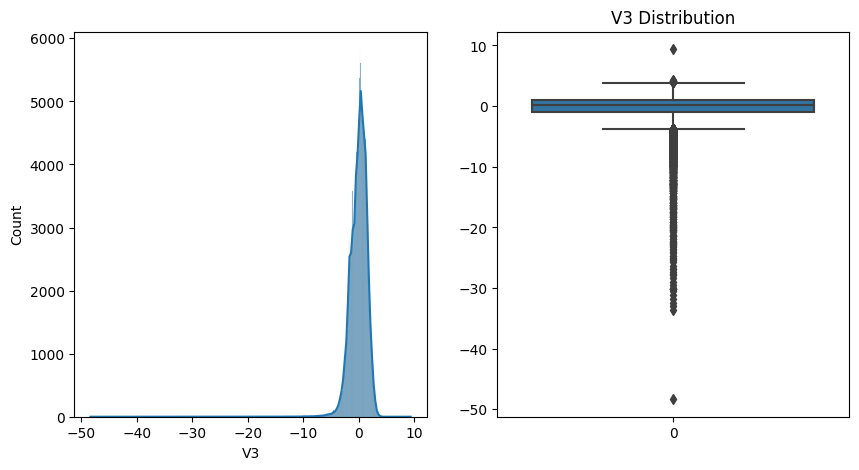

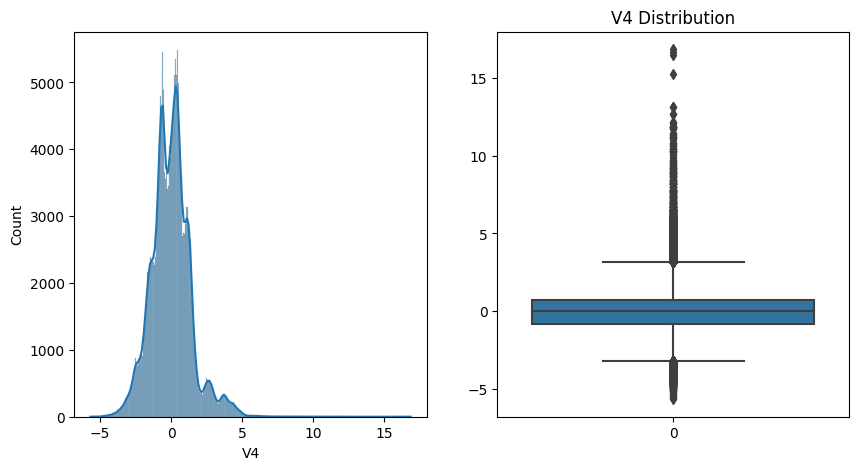

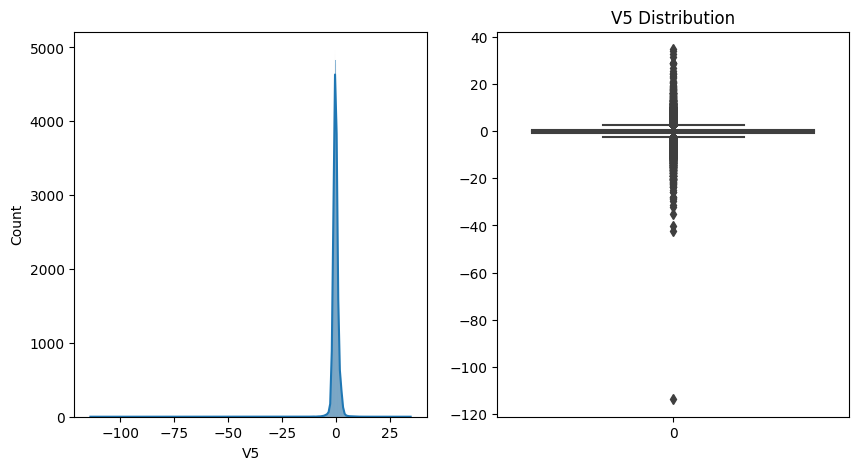

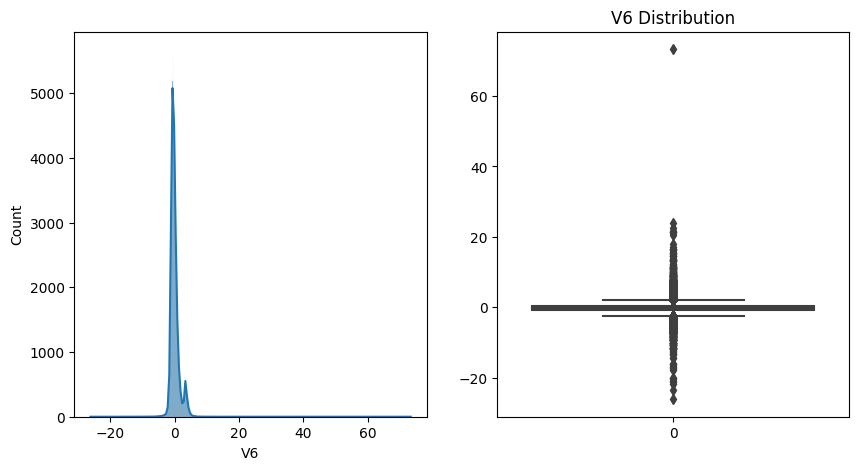

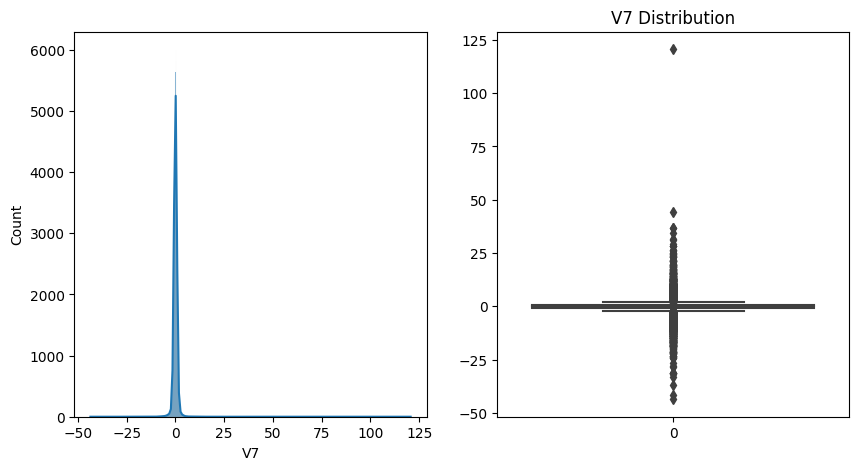

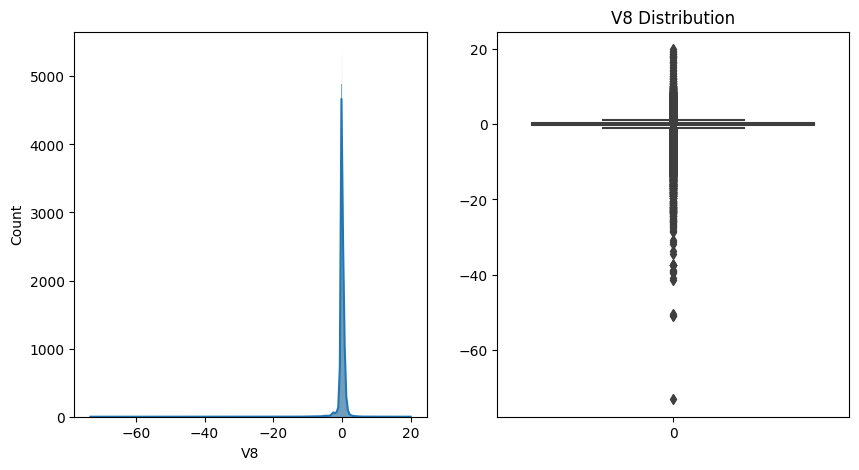

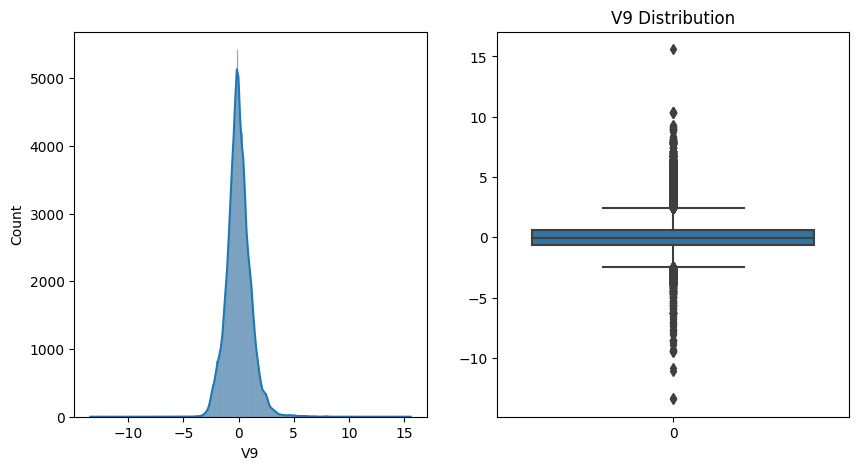

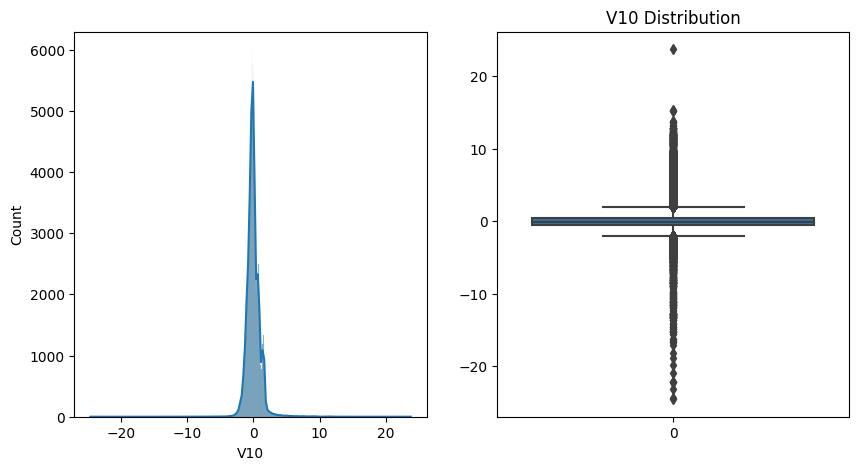

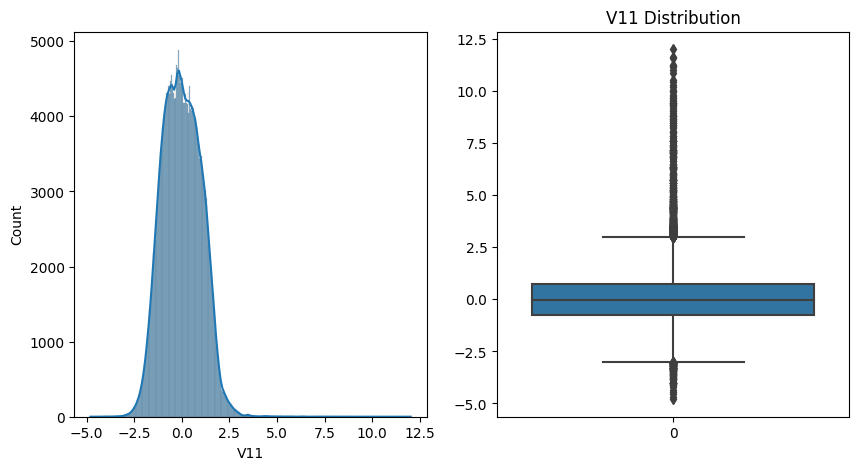

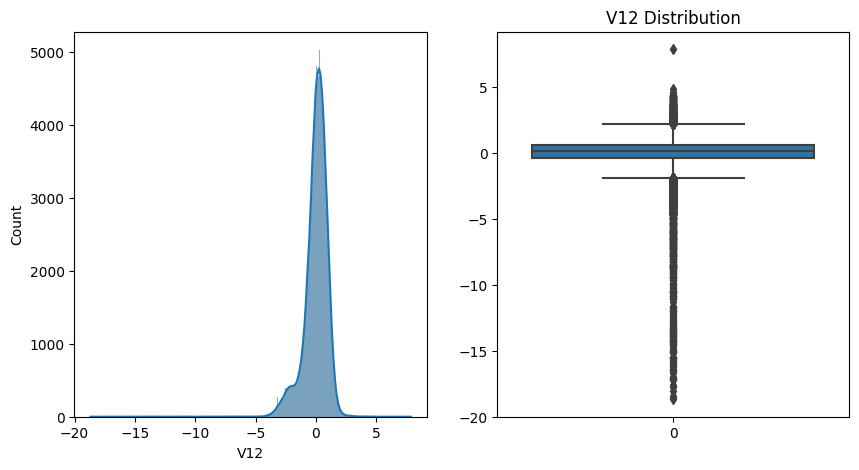

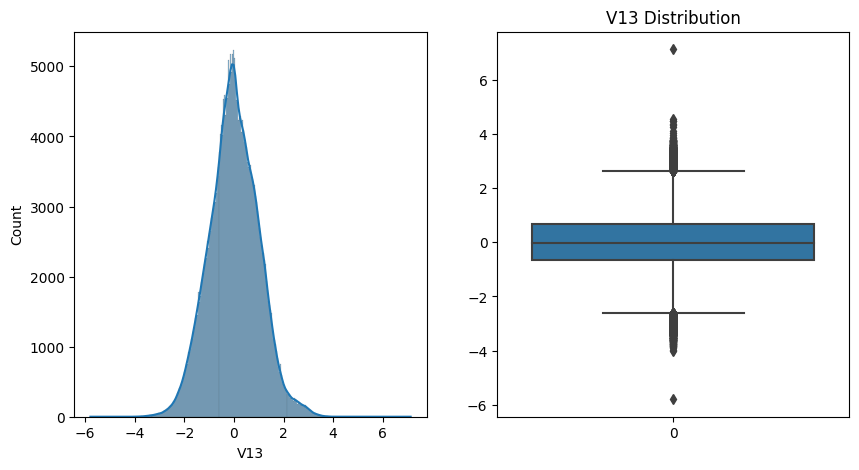

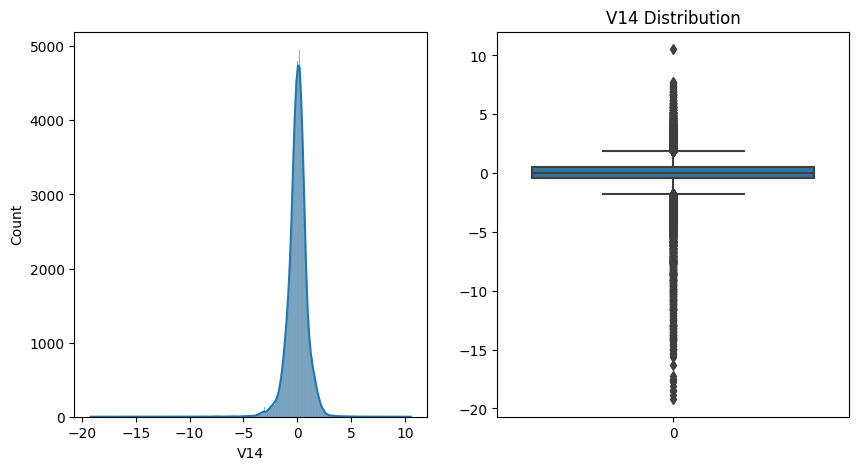

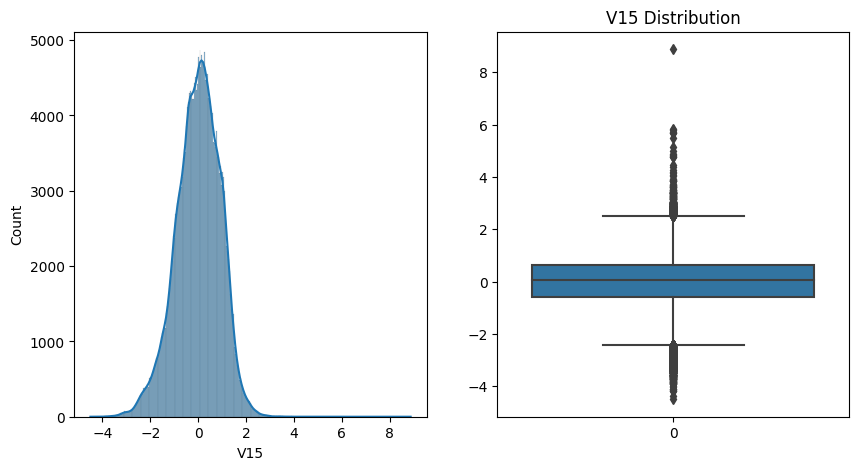

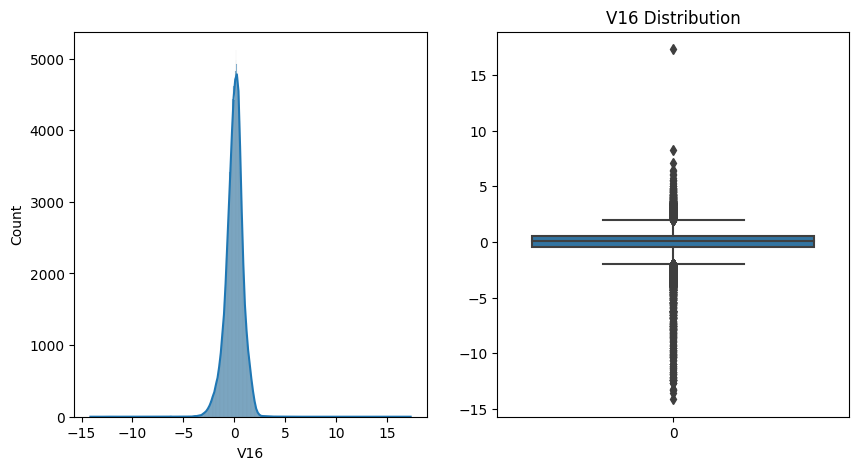

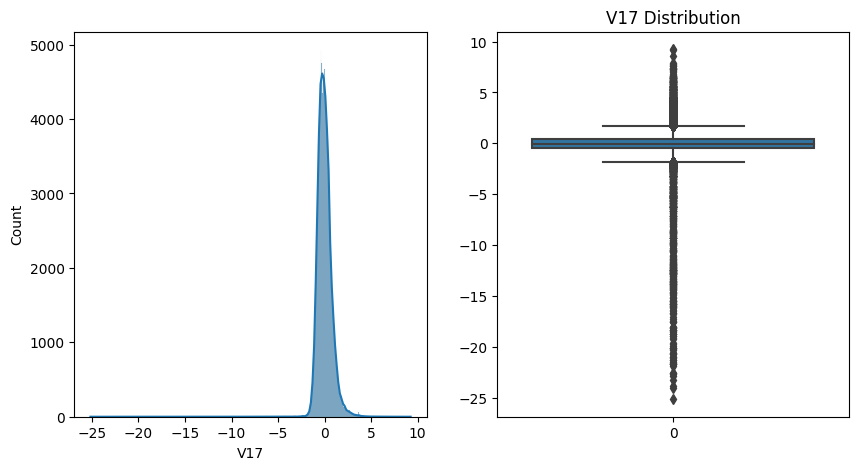

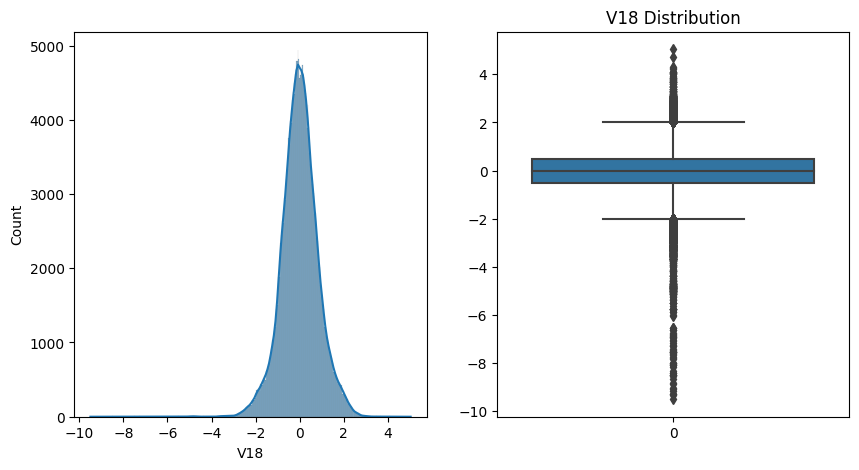

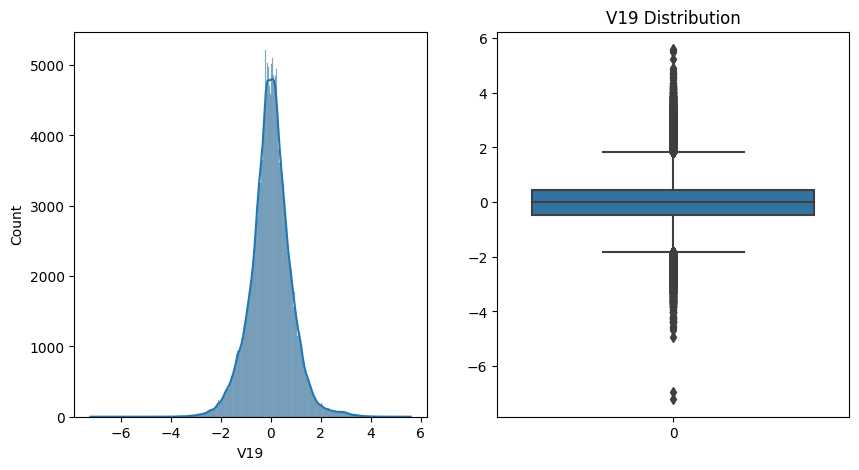

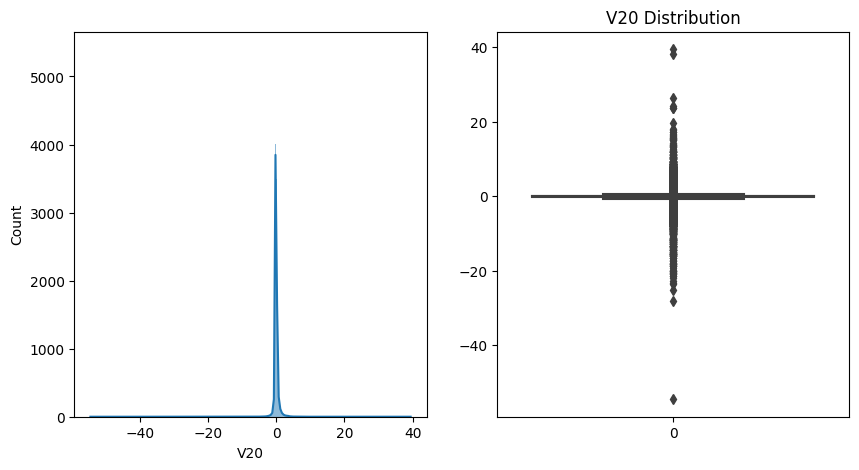

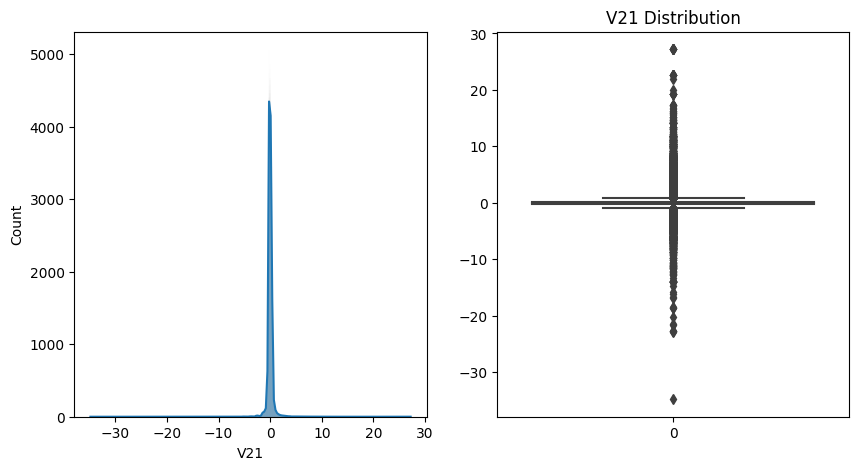

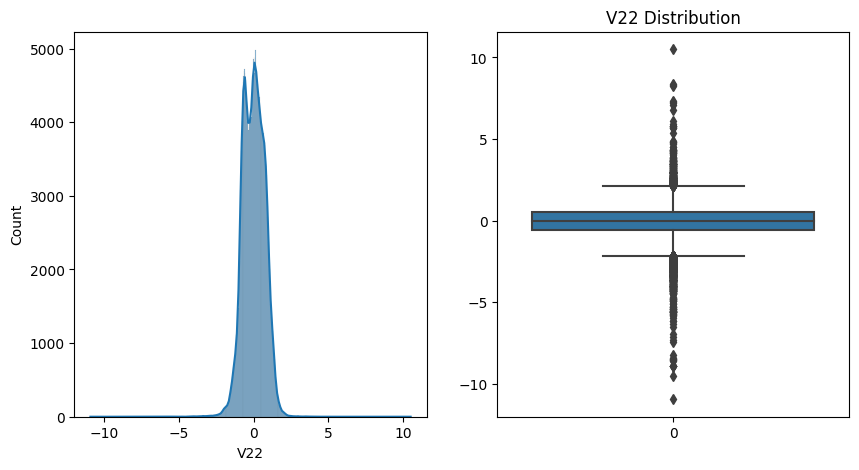

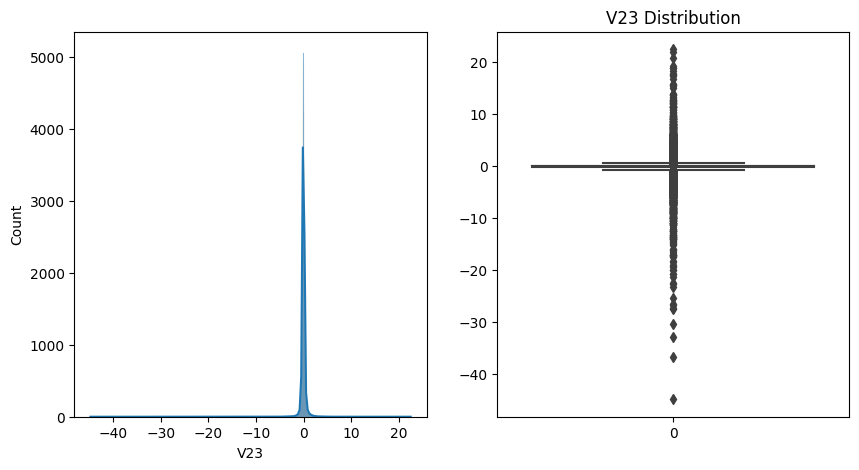

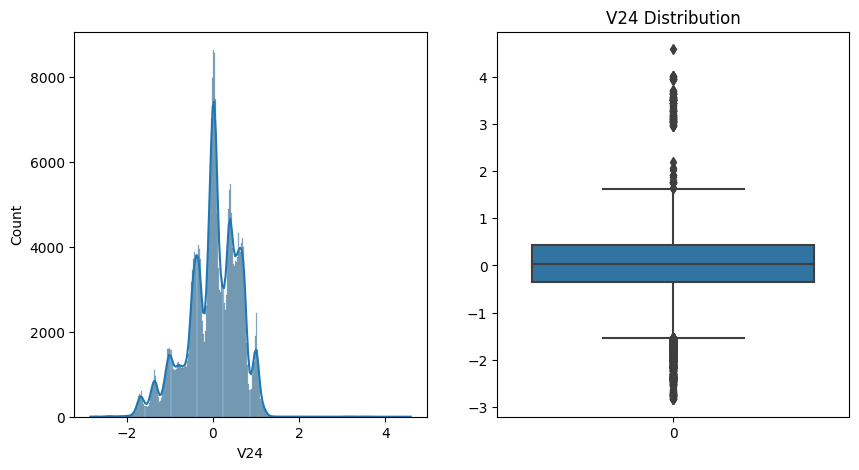

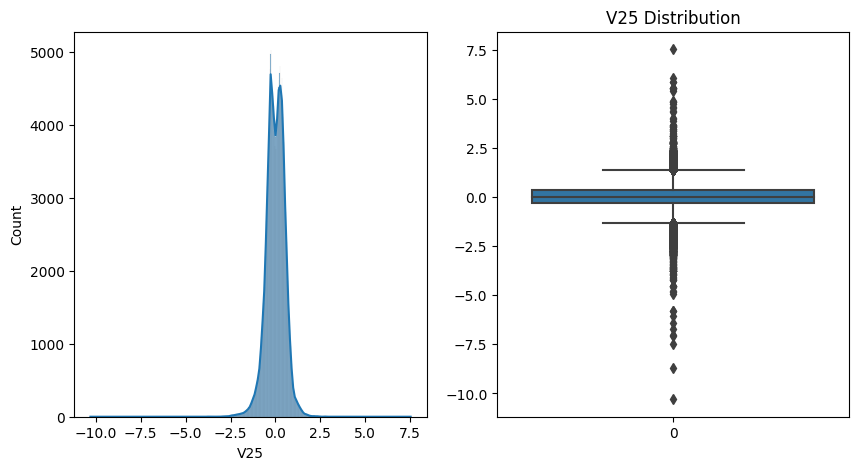

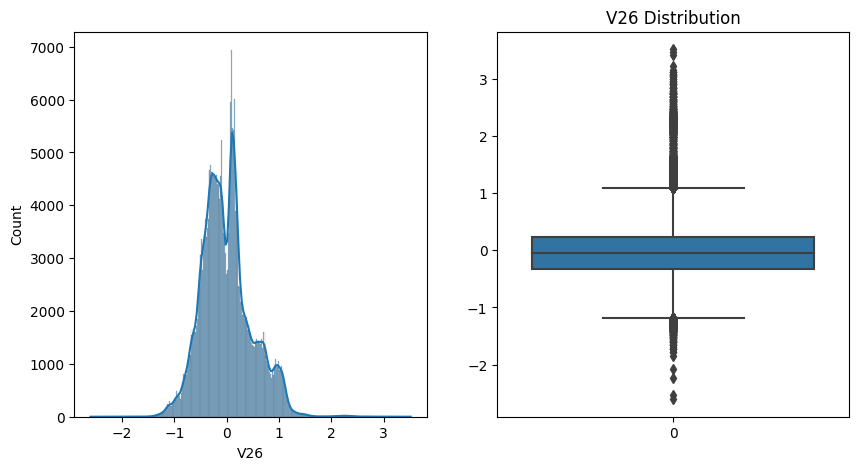

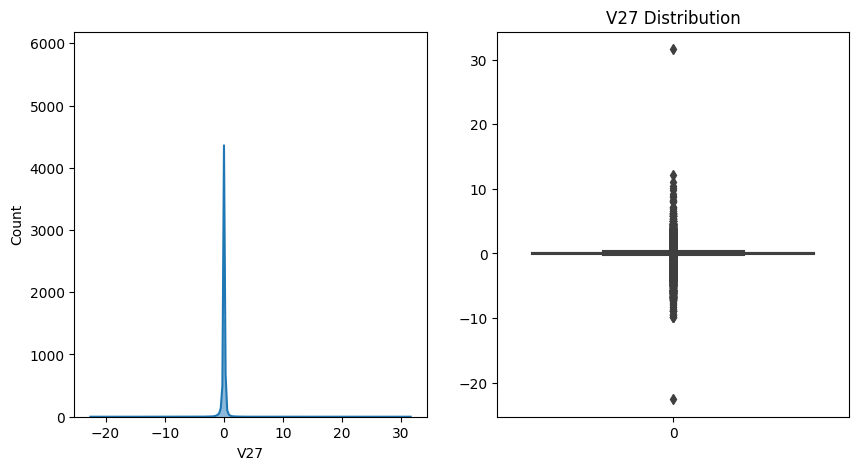

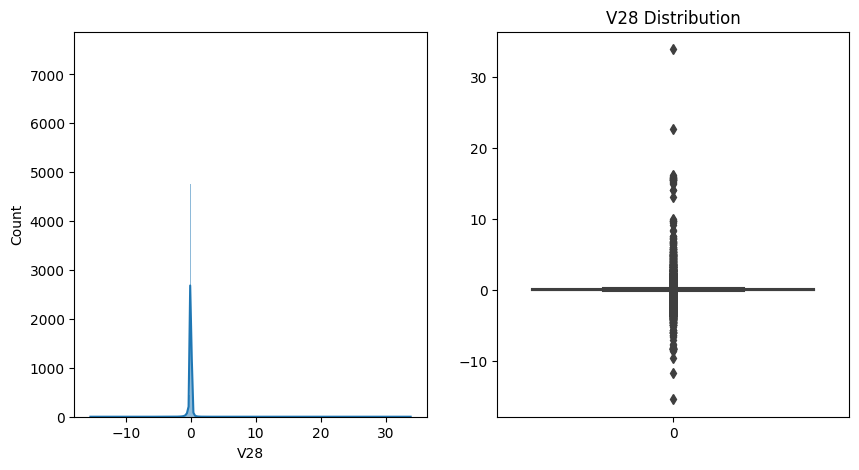

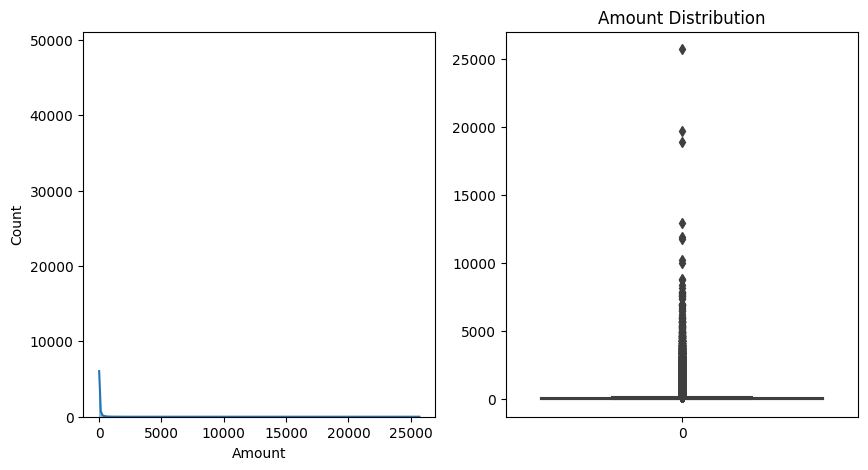

<Figure size 1000x500 with 0 Axes>

In [13]:
for c in df.columns:
    plt.figure(figsize=(10,5))
    if c == 'Class':
        continue
    plt.subplot(121)
    sns.histplot(df[c] ,kde=True)
    plt.subplot(122)
    sns.boxplot(df[c])
    plt.title(c+' Distribution')
    plt.plot()

In [14]:
def eliminate_outliers(df ,c):
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    
    Qtl = q3 - q1
    
    min_ = q1 - 1.5 * Qtl
    max_ = q3 + 1.5 * Qtl
    
    new = df[(df[c] <= max_) & (df[c] >= min_)]
    print(c+' Outliers Number :: ',df.shape[0] - new.shape[0])
    return new

In [15]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Data Cleaning

Eliminate outliers

In [16]:
df_edited = df.copy()
p_df = df[df['Class'] == 1]
n_df = df[df['Class'] == 0]
print('shape before eliminate outliers : ',n_df.shape)
for c in df.columns:
    if c in ['Class' ,'Time']:
        continue
    n_df = eliminate_outliers(n_df ,c)
print('shape after eliminate outliers : ',n_df.shape)

shape before eliminate outliers :  (284315, 31)
V1 Outliers Number ::  6912
V2 Outliers Number ::  8344
V3 Outliers Number ::  1055
V4 Outliers Number ::  10125
V5 Outliers Number ::  8044
V6 Outliers Number ::  13614
V7 Outliers Number ::  2545
V8 Outliers Number ::  15091
V9 Outliers Number ::  5676
V10 Outliers Number ::  8020
V11 Outliers Number ::  92
V12 Outliers Number ::  10188
V13 Outliers Number ::  1242
V14 Outliers Number ::  6234
V15 Outliers Number ::  2059
V16 Outliers Number ::  5564
V17 Outliers Number ::  1868
V18 Outliers Number ::  5175
V19 Outliers Number ::  5508
V20 Outliers Number ::  8584
V21 Outliers Number ::  782
V22 Outliers Number ::  32
V23 Outliers Number ::  3640
V24 Outliers Number ::  2527
V25 Outliers Number ::  1163
V26 Outliers Number ::  4981
V27 Outliers Number ::  16969
V28 Outliers Number ::  7771
Amount Outliers Number ::  10427
shape after eliminate outliers :  (110083, 31)


In [17]:
df_edited = pd.concat([p_df ,n_df] ,ignore_index=True)
df_edited = df_edited.sample(frac=1 ,random_state=42).reset_index()
del p_df ,n_df
df_edited.drop(columns='index' ,inplace=True)
df_edited

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,74093.0,-1.566252,0.296020,0.998181,0.653609,0.447752,0.656482,0.411235,0.749847,-0.730835,-0.806142,-0.018535,0.285103,-0.907981,0.643260,-0.795780,-0.236032,-0.003802,0.172667,0.452879,0.181541,0.093849,-0.138239,-0.144619,-0.835252,0.690248,-0.249124,-0.086434,-0.092400,120.06,0
1,148638.0,1.966258,-0.327119,-0.932569,0.747641,0.016103,-0.029461,-0.092144,-0.078946,1.111553,-0.178088,-1.300741,1.117795,0.635384,-0.485299,-1.671014,-0.821066,0.217038,-1.229527,0.563103,-0.135124,-0.359979,-0.682487,0.274069,0.645158,-0.097722,0.070672,-0.031166,-0.046805,28.48,0
2,42150.0,1.505178,-1.130702,0.665733,-1.411117,-1.631581,-0.461321,-1.282099,-0.117787,-1.561756,1.403930,-0.922913,-0.852185,1.099646,-0.658799,0.817574,-0.015314,0.167641,0.499397,-0.293120,-0.250481,-0.024776,0.357207,-0.109745,-0.101088,0.446444,-0.018505,0.055587,0.025454,24.90,0
3,42931.0,1.090274,-0.563743,1.071925,0.304501,-1.277910,-0.375481,-0.577616,0.043992,1.219188,-0.476946,-0.814833,0.506318,-0.153003,-0.513474,-0.280769,-0.106538,0.155435,-0.610736,0.445815,0.040228,-0.197401,-0.455643,0.026584,0.459081,0.108201,0.936486,-0.046349,0.024893,71.04,0
4,59515.0,1.409075,-0.501581,0.019142,-0.768540,-0.783592,-0.986323,-0.324553,-0.182427,-0.768982,0.650798,-0.788598,-1.394587,-1.151416,0.271486,0.840596,1.285658,0.205312,-1.588060,0.975450,0.041347,-0.319849,-1.202954,0.145619,-0.202889,0.208065,-0.609642,-0.022114,0.015544,34.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110570,133143.0,2.171187,-0.927585,-1.570176,-1.661499,-0.237169,-0.298343,-0.431011,-0.109370,-0.200044,0.555590,0.420549,0.906213,0.416967,0.221581,-0.625588,-1.724448,-0.191794,1.016314,0.326219,-0.519403,-0.608934,-1.176634,0.341967,0.214417,-0.329772,0.388855,-0.063890,-0.067423,19.48,0
110571,172057.0,0.037297,0.875908,0.294599,-0.583176,0.405611,-1.111237,1.056108,-0.226631,-0.090652,-0.425073,-0.870391,0.289270,0.292825,0.056859,-0.434815,-0.107746,-0.422111,-0.783848,-0.090722,-0.008932,-0.253538,-0.546642,0.080640,0.046448,-0.478596,0.136594,0.247112,0.098456,9.21,0
110572,163243.0,0.090351,0.787187,-0.296789,-1.068828,1.260345,0.236703,0.828873,0.101666,-0.251891,-0.248674,-0.199159,0.462446,0.198141,0.216674,-0.987608,0.441936,-1.079107,0.126612,0.623771,0.038822,-0.285680,-0.709115,-0.044286,-0.356659,-0.355143,0.153298,0.237878,0.083374,1.79,0
110573,604.0,1.052778,-0.128503,0.545900,0.533815,-0.712614,-0.789848,-0.009829,-0.032816,-0.079687,0.068149,1.539626,0.663897,-0.711846,0.640009,0.432373,0.524883,-0.530292,-0.097018,0.154878,0.016625,-0.250542,-1.001790,0.158736,0.499039,-0.011762,0.067041,-0.060046,0.023133,79.95,0


In [18]:
df_edited['Class'].value_counts()

Class
0    110083
1       492
Name: count, dtype: int64

In [19]:
df_edited.duplicated().sum()

263

# Data Preprocessing

## Balancing Data

**Over Sampling**

In [20]:
s = SMOTE(random_state = 42)

In [21]:
X = df_edited.drop(columns='Class')
y = df_edited.Class

In [22]:
x_b ,y_b = s.fit_resample(X ,y)

In [23]:
y_b.value_counts()

Class
0    110083
1    110083
Name: count, dtype: int64

**Scale the data**

In [24]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(x_b)

x_b = pd.DataFrame(scaled_data, columns=x_b.columns)
x_b

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.428816,0.880172,0.285562,0.919964,0.250556,0.679303,0.548334,0.890775,0.684572,0.756704,0.830970,0.202502,0.913260,0.373503,0.876453,0.531277,0.804529,0.788629,0.727772,0.464048,0.283774,0.457825,0.507205,0.773029,0.358487,0.782832,0.231802,0.695731,0.486999,0.056476
1,0.860248,0.987438,0.265104,0.864634,0.256705,0.666302,0.495079,0.880577,0.670996,0.866451,0.852915,0.117554,0.953350,0.633187,0.826642,0.405711,0.770652,0.795552,0.622258,0.476419,0.262923,0.448749,0.475652,0.789966,0.803424,0.670101,0.313844,0.701088,0.499495,0.013397
2,0.243945,0.973437,0.238722,0.910437,0.115543,0.616674,0.461550,0.856469,0.670360,0.707207,0.908192,0.142586,0.858505,0.711303,0.818985,0.762739,0.817310,0.794003,0.752359,0.380324,0.255327,0.455453,0.535928,0.774440,0.579140,0.747953,0.290966,0.709498,0.519300,0.011713
3,0.248465,0.960838,0.257336,0.922078,0.227728,0.627326,0.468215,0.870742,0.673010,0.872862,0.842473,0.149746,0.923910,0.500534,0.825399,0.605164,0.812027,0.793621,0.668821,0.463255,0.274469,0.452000,0.488804,0.779955,0.747499,0.699562,0.535966,0.699617,0.519146,0.033417
4,0.344445,0.970519,0.259376,0.891908,0.157562,0.642215,0.420791,0.875869,0.669301,0.754431,0.881877,0.151484,0.832390,0.332543,0.860045,0.766041,0.892643,0.795184,0.595278,0.522696,0.274543,0.449551,0.445479,0.784770,0.548544,0.713849,0.139312,0.701966,0.516584,0.016417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220161,0.757051,0.947696,0.239420,0.836548,0.476531,0.660278,0.444838,0.904158,0.666398,0.759634,0.852686,0.199286,0.898920,0.623593,0.747604,0.589603,0.897204,0.828717,0.758502,0.201030,0.345163,0.461012,0.482209,0.764696,0.658936,0.631831,0.220599,0.694454,0.546971,0.302678
220162,0.593895,0.805037,0.453348,0.634441,0.583661,0.580285,0.348525,0.735586,0.655373,0.588062,0.572406,0.675112,0.412457,0.835412,0.477130,0.563647,0.355164,0.475983,0.472247,0.764087,0.364007,0.453900,0.599461,0.781828,0.505077,0.720348,0.313148,0.688371,0.450642,0.000443
220163,0.321324,0.716884,0.350122,0.662262,0.546396,0.549096,0.384297,0.724016,0.691885,0.591385,0.578237,0.592149,0.476419,0.267609,0.423662,0.709335,0.390914,0.387281,0.387993,0.671652,0.266393,0.458499,0.543315,0.787394,0.450083,0.687760,0.263130,0.825185,0.560745,0.043747
220164,0.154948,0.316394,0.677057,0.240920,0.608278,0.202980,0.160556,0.563793,0.892604,0.563823,0.550314,0.580112,0.513349,0.570579,0.473910,0.644940,0.418947,0.368412,0.343889,0.549474,0.376505,0.490988,0.432644,0.747842,0.645568,0.882523,0.238599,0.857742,0.641614,0.047035


**Split data**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x_b, y_b, test_size=0.3, random_state=42)

# Modeling

## ML Models

In [26]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [27]:
models={
    'SVC':SVC(),
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'RandomForestClassifier':RandomForestClassifier(n_estimators=2),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5)
}

In [28]:
results = {'Algorithm': [], 'accuracy': [], 'classification_report': []}

In [29]:
def TrainModels(model ,x_tain ,x_test ,y_train ,y_test):
    model.fit(x_tain,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    c_report = classification_report(y_test, y_pred)
    return acc ,c_report

In [30]:
for name ,model in models.items():
    print(name + ' model begin the training ...')
    accuracy ,c_report = TrainModels(model ,X_train, X_test, y_train, y_test) 
    results['Algorithm'].append(name)
    results['accuracy'].append(accuracy)
    results['classification_report'].append(c_report)
    print('the training of the model '+name+' is done')
results_df = pd.DataFrame(results)
results_df

SVC model begin the training ...
the training of the model SVC is done
LogisticRegression model begin the training ...
the training of the model LogisticRegression is done
DecisionTreeClassifier model begin the training ...
the training of the model DecisionTreeClassifier is done
GradientBoostingClassifier model begin the training ...
the training of the model GradientBoostingClassifier is done
RandomForestClassifier model begin the training ...
the training of the model RandomForestClassifier is done
KNeighborsClassifier model begin the training ...
the training of the model KNeighborsClassifier is done


,Algorithm,accuracy,classification_report
0,SVC,0.992672,precision recall f1-score ...
1,LogisticRegression,0.989387,precision recall f1-score ...
2,DecisionTreeClassifier,0.998834,precision recall f1-score ...
3,GradientBoostingClassifier,0.996351,precision recall f1-score ...
4,RandomForestClassifier,0.998622,precision recall f1-score ...
5,KNeighborsClassifier,0.999606,precision recall f1-score ...


In [31]:
r = pd.DataFrame(results)
r.loc[0,'classification_report']

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99     32910\n           1       1.00      0.99      0.99     33140\n\n    accuracy                           0.99     66050\n   macro avg       0.99      0.99      0.99     66050\nweighted avg       0.99      0.99      0.99     66050\n'

## Cross Validation 

In [32]:
cv_scores = cross_val_score(SVC(), x_b, y_b, cv=5, scoring='accuracy')
cv_scores

array([0.99273289, 0.99375468, 0.99359571, 0.99350487, 0.99300525])

In [33]:
cv_scores.mean()

0.9933186803856733

# Saving The Model 

In [34]:
import joblib as jb

In [35]:
classification_report(models['SVC'].predict(X_test) ,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99     33366\n           1       0.99      1.00      0.99     32684\n\n    accuracy                           0.99     66050\n   macro avg       0.99      0.99      0.99     66050\nweighted avg       0.99      0.99      0.99     66050\n'

In [36]:
jb.dump(models['SVC'] ,'creadit_card_fraud_detection.joblib')

['creadit_card_fraud_detection.joblib']